# 時系列分析

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./data/weather_saito.csv", index_col='年月', encoding="shift-jis", parse_dates=True)

In [5]:
df.head(5)

,平均気温,品質情報,均質番号
年月,,,
2000-01-01,7.6,8,1
2000-02-01,6.0,8,1
2000-03-01,9.4,8,1
2000-04-01,14.5,8,1
2000-05-01,19.8,8,1


In [6]:
# グラフを大きくして見やすくします。
plt.rcParams['figure.figsize'] = 20, 5

c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=f

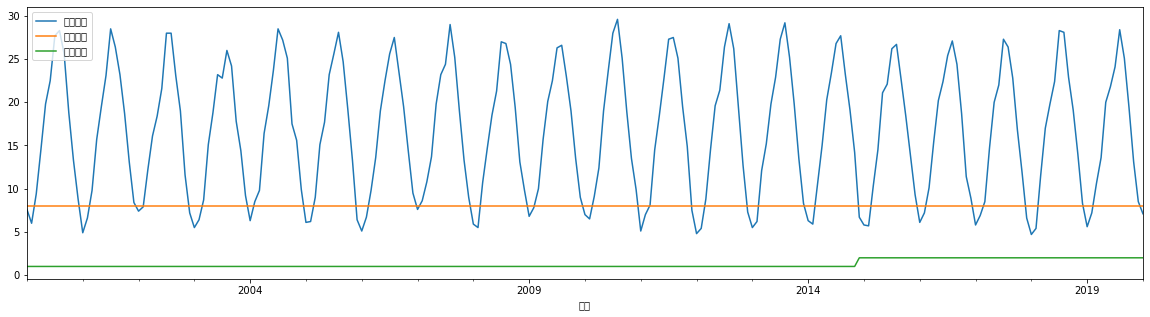

In [7]:
df.plot().legend(loc='upper left')

In [8]:
ts = df['平均気温']

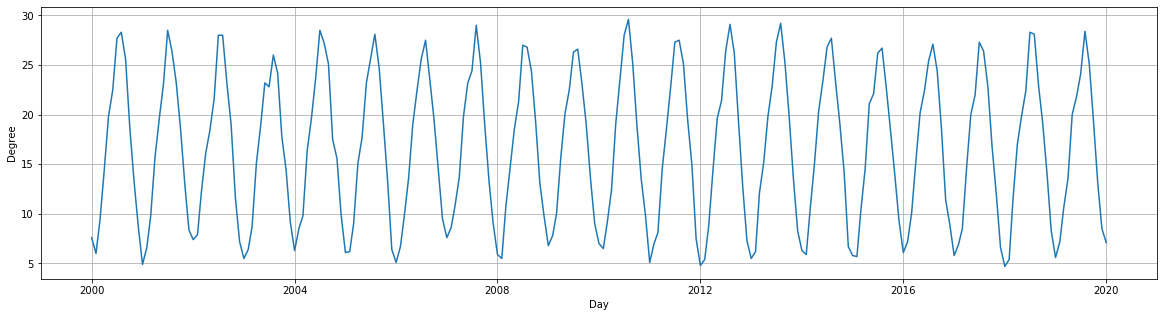

In [9]:
plt.plot(ts)
plt.ylabel('Degree')
plt.xlabel('Day')
plt.grid()
plt.show()

In [10]:
# タイプ、shape確認
print(ts.dtype, ts.shape)

float64 (241,)


In [11]:
ts_log = np.log(ts + 1e-8) # log(0)にならないようにごく小さな値を加える

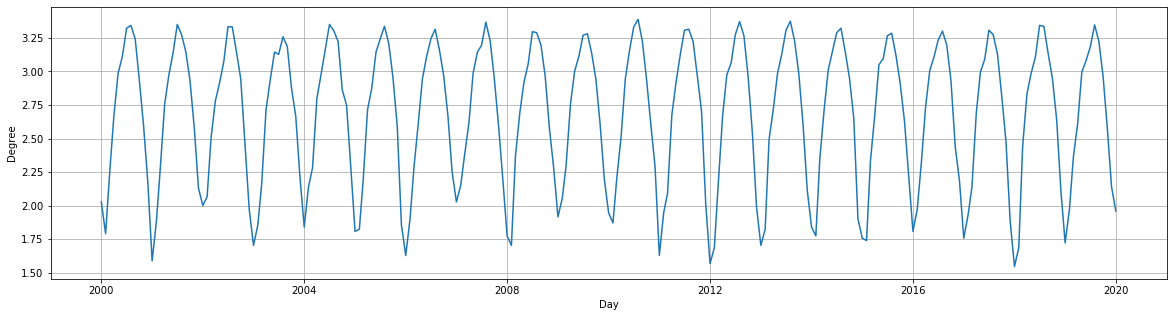

In [12]:
# 対数変換してもグラフの形は同じように残るため、心配無用
plt.plot(ts_log)
plt.ylabel('Degree')
plt.xlabel('Day')
plt.grid()
plt.show()

In [13]:
ts_diff = []
for i in range(len(ts)-1):
    j = i+1
    ts_diff.append(ts[j] - ts[j-1]) # numpy.appendは遅くなりがちなので配列で計算
ts_diff = np.array(ts_diff)

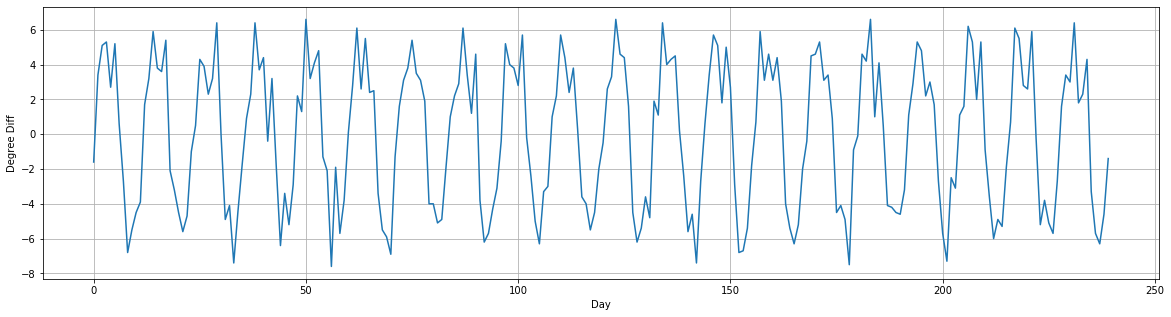

In [14]:
plt.plot(ts_diff)
plt.ylabel('Degree Diff')
plt.xlabel('Day')
plt.grid()
plt.show()

In [15]:
import statsmodels.api as sm

In [16]:
acv_len = 24

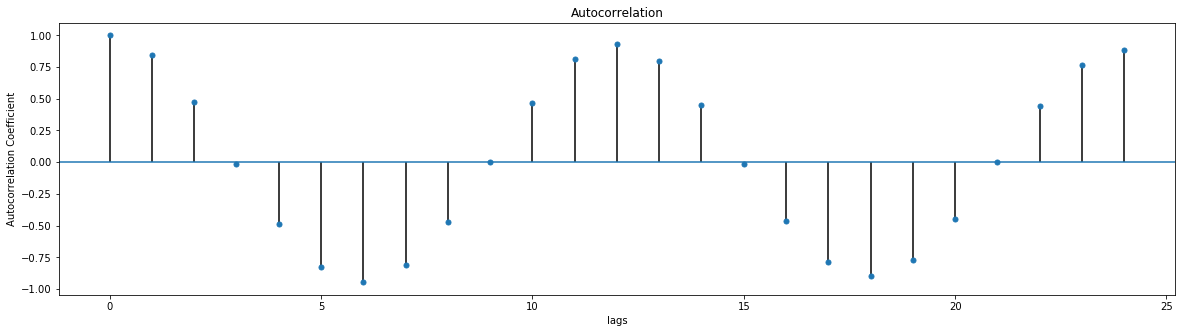

In [17]:
sm.graphics.tsa.plot_acf(ts, lags=acv_len, alpha = None)
plt.xlabel("lags")
plt.ylabel("Autocorrelation Coefficient")
plt.show()

In [18]:
acv_all = []
for lags in range(acv_len): # ラグ（比較する差の大きさ）
    n = len(ts) # 全体のデータ数：n
    n_lag = n - lags # ラグ時のデータ数：n - lags
    ut = np.mean(ts) # 平均値µの導出：ut
    # Σ計算用配列
    acv_up = []
    acv_dw = []
    # 上部式計算 1/n_lag*Σ((yt1 - ut) * (yt2 - ut))
    for i in range(n_lag):
        yt1 = ts[i]
        yt2 = ts[i+lags]
        acv_up.append((yt1 - ut) * (yt2 - ut))
    # 下部計算 1/n*Σ((yt - ut)^2)
    for i in range(n):
        yt = ts[i]
        acv_dw.append(pow((yt - ut), 2))
    # sumを使うため、numpy行列に変換して計算
    sum_up = np.sum(np.array(acv_up)) / n_lag
    sum_dw = np.sum(np.array(acv_dw)) / n
    acv_all.append(sum_up / sum_dw) # 自己相関係数に計算して追加

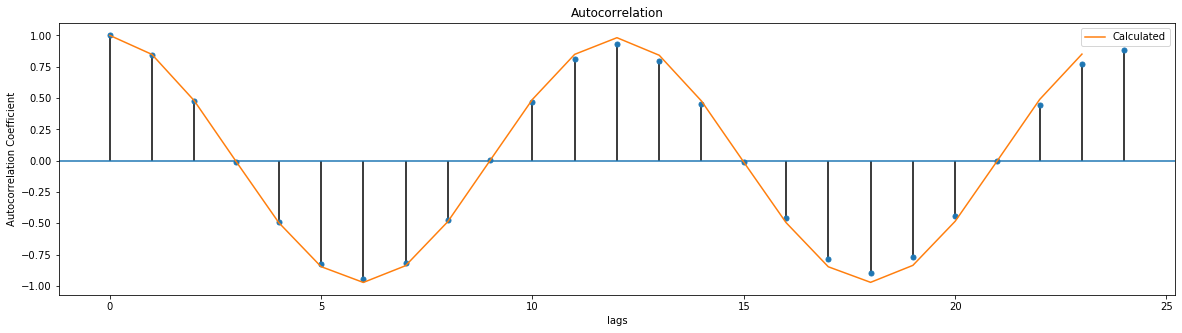

In [19]:
sm.graphics.tsa.plot_acf(ts, lags=acv_len, alpha = None)
plt.plot(acv_all, label="Calculated")
plt.xlabel("lags")
plt.ylabel("Autocorrelation Coefficient")
plt.legend()
plt.show()

# 時系列分析 by 統計学的手法

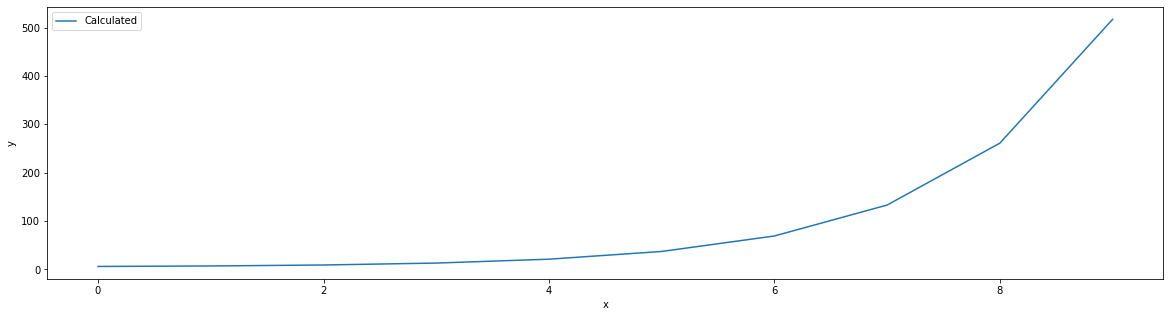

In [20]:
x = np.array(range(0, 10))
y = 2**x + 5
plt.plot(x, y, label="Calculated")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [21]:
from statsmodels.tsa import stattools as st

In [22]:
st.adfuller(ts.values.ravel())

(-4.370883323806928,
 0.0003341033996174608,
 15,
 225,
 {'1%': -3.4597521044060353,
  '5%': -2.874472927517147,
  '10%': -2.5736628197530864},
 733.9882718343765)

In [23]:
# データの長さを確認します。
print(ts.shape)

(241,)


In [24]:
# 半分くらいで学習データ、その他の（検証）データを分けます。
train_len = 120

In [25]:
# データを分割します。
train = ts[:train_len]
test = ts[train_len:]

In [26]:
# 分けることができました。
print(train.shape, test.shape)

(120,) (121,)


In [27]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [28]:
# 読み込んだモジュールを設定します。
model_ar = AR
model_arma = ARMA
model_arima = ARIMA
model_sarima = SARIMAX

In [29]:
# AR、ARMAを計算します。
result_ar = model_ar(train).fit(ic='aic')
result_arma = model_arma(train, order=[1, 1]).fit(ic='aic')

c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATI

In [30]:
predict_ar = result_ar.predict(train_len, ts.shape[0])
predict_arma = result_arma.predict(train_len, ts.shape[0])

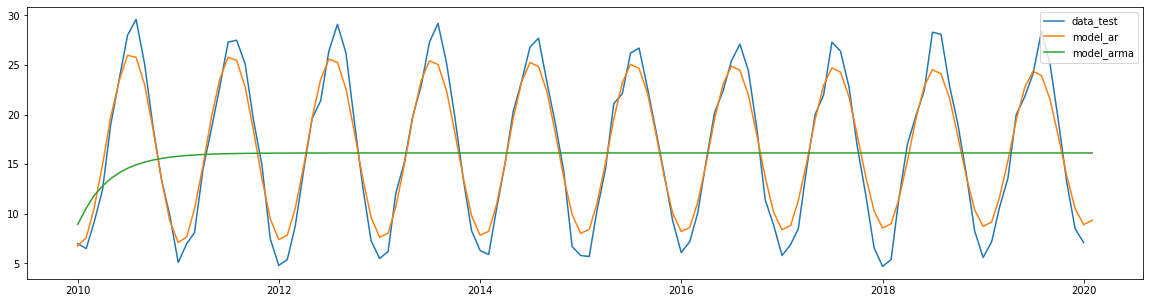

In [31]:
plt.plot(test, label="data_test")
plt.plot(predict_ar, label="model_ar")
plt.plot(predict_arma, label="model_arma")
plt.legend()
plt.show()

In [30]:
columns = ['params', 'aic']

In [31]:
# AR
result_test = pd.DataFrame(columns=columns)
num = 0
for p in range(1, 51):
    test_params = "p=%d" % p
    print(test_params)
    test_aic = model_ar(train).fit(ic='aic', maxlag=p).aic
    test_app = pd.Series(data=[test_params, test_aic], index=columns, name=num)
    result_test = result_test.append(test_app)
    num += 1

p=1
p=2
p=3
p=4
p=5
p=6
p=7
p=8
p=9
p=10
p=11
p=12
p=13
p=14
p=15
p=16
p=17
p=18
p=19


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No

p=20
p=21
p=22
p=23
p=24
p=25
p=26
p=27
p=28
p=29


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No

p=30
p=31
p=32
p=33
p=34
p=35
p=36


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No

p=37
p=38
p=39
p=40
p=41


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No

p=42
p=43
p=44
p=45


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No

p=46
p=47
p=48
p=49

C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



p=50


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [32]:
result_test.sort_values(by='aic').head(5)

,params,aic
49,p=50,0.495687
31,p=32,0.495687
32,p=33,0.495687
36,p=37,0.495687
34,p=35,0.505825


In [33]:
result_test = pd.DataFrame(columns=columns)
num = 0
for p in range(3, 7):
    for q in range(2):
        test_params = "p=%d, q=%d" % (p, q)
        print(test_params)
        test_aic = model_arma(train, order=[p, q]).fit(ic='aic').aic
        test_app = pd.Series(data=[test_params, test_aic], index=columns, name=num)
        result_test = result_test.append(test_app)
        num += 1

p=3, q=0
p=3, q=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=4, q=0
p=4, q=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, q=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, q=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, q=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, q=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [34]:
result_test.sort_values(by='aic').head(5)

,params,aic
7,"p=6, q=1",433.980456
5,"p=5, q=1",434.874555
6,"p=6, q=0",435.315563
3,"p=4, q=1",435.340541
1,"p=3, q=1",439.657904


In [35]:
result_test = pd.DataFrame(columns=columns)
num = 0
for p in range(3, 7):
    for d in range(1, 3):
        for q in range(2, 3):
            for sp in range(2): # 0or1
                for sd in range(2):
                    for sq in range(2):
                        test_params = "p=%d, d=%d, q=%d, sp=%d, sd=%d, sq=%d" % (p, d, q, sp, sd, sq)
                        print(test_params)
                        test_aic = model_sarima(train,
                                                order=[p, d, q],
                                                seasonal_order=[sp, sd, sq, 12], # 12ヶ月周期
                                                force_stationarity = False,
                                                enforce_invertibility = False,
                                                ensure_invertibility = False,
                                                enforce_stationarity = False,
                                               ).fit(ic='aic').aic
                        test_app = pd.Series(data=[test_params, test_aic], index=columns, name=num)
                        result_test = result_test.append(test_app)
                        num += 1

p=3, d=1, q=2, sp=0, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=3, d=1, q=2, sp=0, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=3, d=1, q=2, sp=0, sd=1, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=3, d=1, q=2, sp=0, sd=1, sq=1
p=3, d=1, q=2, sp=1, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=3, d=1, q=2, sp=1, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=3, d=1, q=2, sp=1, sd=1, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=3, d=1, q=2, sp=1, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=3, d=2, q=2, sp=0, sd=0, sq=0
p=3, d=2, q=2, sp=0, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=3, d=2, q=2, sp=0, sd=1, sq=0
p=3, d=2, q=2, sp=0, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=3, d=2, q=2, sp=1, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=3, d=2, q=2, sp=1, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=3, d=2, q=2, sp=1, sd=1, sq=0
p=3, d=2, q=2, sp=1, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=4, d=1, q=2, sp=0, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=4, d=1, q=2, sp=0, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=4, d=1, q=2, sp=0, sd=1, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=4, d=1, q=2, sp=0, sd=1, sq=1
p=4, d=1, q=2, sp=1, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=4, d=1, q=2, sp=1, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=4, d=1, q=2, sp=1, sd=1, sq=0
p=4, d=1, q=2, sp=1, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=4, d=2, q=2, sp=0, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=4, d=2, q=2, sp=0, sd=0, sq=1
p=4, d=2, q=2, sp=0, sd=1, sq=0
p=4, d=2, q=2, sp=0, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=4, d=2, q=2, sp=1, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=4, d=2, q=2, sp=1, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=4, d=2, q=2, sp=1, sd=1, sq=0
p=4, d=2, q=2, sp=1, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=1, q=2, sp=0, sd=0, sq=0
p=5, d=1, q=2, sp=0, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=1, q=2, sp=0, sd=1, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=1, q=2, sp=0, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=1, q=2, sp=1, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=1, q=2, sp=1, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=1, q=2, sp=1, sd=1, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=1, q=2, sp=1, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=2, q=2, sp=0, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=2, q=2, sp=0, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=2, q=2, sp=0, sd=1, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=2, q=2, sp=0, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=2, q=2, sp=1, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=2, q=2, sp=1, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=5, d=2, q=2, sp=1, sd=1, sq=0
p=5, d=2, q=2, sp=1, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, d=1, q=2, sp=0, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, d=1, q=2, sp=0, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, d=1, q=2, sp=0, sd=1, sq=0
p=6, d=1, q=2, sp=0, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, d=1, q=2, sp=1, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, d=1, q=2, sp=1, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, d=1, q=2, sp=1, sd=1, sq=0
p=6, d=1, q=2, sp=1, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, d=2, q=2, sp=0, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, d=2, q=2, sp=0, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, d=2, q=2, sp=0, sd=1, sq=0
p=6, d=2, q=2, sp=0, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, d=2, q=2, sp=1, sd=0, sq=0


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, d=2, q=2, sp=1, sd=0, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p=6, d=2, q=2, sp=1, sd=1, sq=0
p=6, d=2, q=2, sp=1, sd=1, sq=1


C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [36]:
result_test.sort_values(by='aic').head(5)

,params,aic
55,"p=6, d=1, q=2, sp=1, sd=1, sq=1",299.974251
3,"p=3, d=1, q=2, sp=0, sd=1, sq=1",301.274574
39,"p=5, d=1, q=2, sp=1, sd=1, sq=1",302.585674
19,"p=4, d=1, q=2, sp=0, sd=1, sq=1",302.796710
35,"p=5, d=1, q=2, sp=0, sd=1, sq=1",304.683979


In [37]:
result_ar = model_ar(train).fit(ic='aic', maxlag=50)
result_arma = model_arma(train, order=[6, 1]).fit(ic='aic')
result_sarima = model_sarima(
    train, order=[6, 1, 2],
    seasonal_order=[1, 1, 1, 12],
    force_stationarity = False,
    enforce_invertibility = False,
    ensure_invertibility = False,
    enforce_stationarity = False,
).fit(ic='aic')

C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [38]:
predict_ar = result_ar.predict(train_len, ts.shape[0])
predict_arma = result_arma.predict(train_len, ts.shape[0])
predict_sarima = result_sarima.predict(train_len, ts.shape[0])

C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


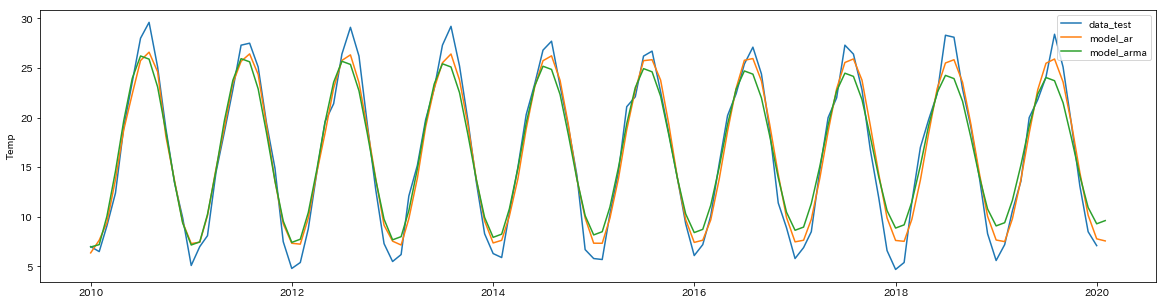

In [39]:
plt.plot(test, label="data_test")
plt.plot(predict_ar, label="model_ar")
plt.plot(predict_arma, label="model_arma")
plt.ylabel('Temp')
plt.legend()
plt.show()

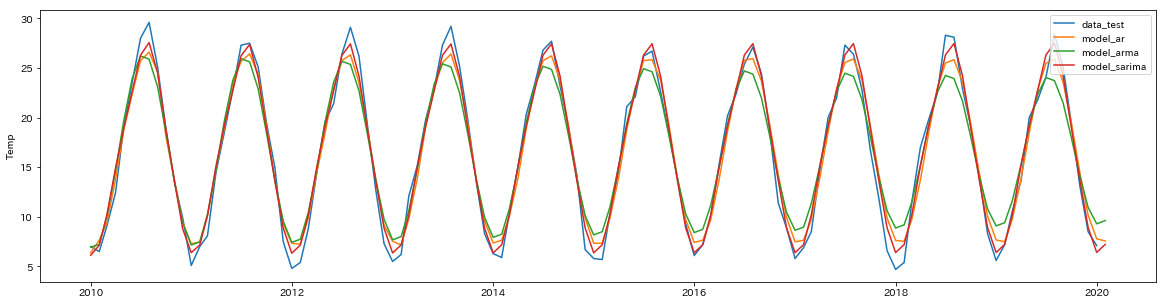

In [40]:
plt.plot(test, label="data_test")
plt.plot(predict_ar, label="model_ar")
plt.plot(predict_arma, label="model_arma")
plt.plot(predict_sarima, label="model_sarima")
plt.ylabel('Temp')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
print("AR RMSE：", mean_squared_error(test, predict_ar[:121]))
print("ARMA RMSE：", mean_squared_error(test, predict_arma[:121]))
print("SARIMA RMSE：", mean_squared_error(test, predict_sarima[:121]))

AR RMSE： 2.1711343296843384
ARMA RMSE： 3.7366434743487695
SARIMA RMSE： 1.1923929079087516


# 時系列分析 by RNN, LSTM, GRU

In [43]:
data_base = ts

In [44]:
ts_size = 6 # 時系列の長さを設定（SARIMAのパラメータpが6だったため）
len_size = len(data_base)
shape_size = len_size - ts_size

In [45]:
data_x = []
data_y = []
for i in range(shape_size):
    i_for = len_size - shape_size + i
    data_x.append(data_base[i:i_for])
    data_y.append(data_base[i_for])
data_x = np.array(data_x)
data_y = np.array(data_y)

In [46]:
print(data_x.shape, data_y.shape)

(235, 6) (235,)


In [47]:
X_train = data_x[:train_len]
X_test = data_x[train_len:]
y_train = data_y[:train_len]
y_test = data_y[train_len:]

In [48]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [49]:
print(X_train.shape, X_test.shape)

(120, 1, 6) (115, 1, 6)


In [50]:
from keras import models, layers, metrics

Using TensorFlow backend.
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\m.saito\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\m.sai

In [208]:
model_rnn = models.Sequential()
model_rnn.add(layers.SimpleRNN(100, activation='tanh', input_shape=(1, ts_size)))
model_rnn.add(layers.Dense(1))
model_rnn.add(layers.Activation("linear"))
model_rnn.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[metrics.mae])

In [209]:
model_lstm = models.Sequential()
model_lstm.add(layers.LSTM(100, activation='tanh', input_shape=(1, ts_size)))
model_lstm.add(layers.Dense(1))
model_lstm.add(layers.Activation("linear"))
model_lstm.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[metrics.mae])

In [210]:
model_gru = models.Sequential()
model_gru.add(layers.GRU(100, activation='tanh', input_shape=(1, ts_size)))
model_gru.add(layers.Dense(1))
model_gru.add(layers.Activation("linear"))
model_gru.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[metrics.mae])

In [211]:
print("# start RNN") # batch_sizeを1、シャッフルを禁止にすることがポイントです
his_rnn = model_rnn.fit(X_train, y_train, batch_size=1, epochs=5, verbose=1, shuffle=False, validation_data=(X_test, y_test))
print("# start LSTM")
his_lstm = model_lstm.fit(X_train, y_train, batch_size=1, epochs=5, verbose=1, shuffle=False, validation_data=(X_test, y_test))
print("# start GRU")
his_gru = model_gru.fit(X_train, y_train, batch_size=1, epochs=5, verbose=1, shuffle=False, validation_data=(X_test, y_test))

# start RNN
Train on 120 samples, validate on 115 samples
Epoch 1/5
120/120 [==============================] - 1s 11ms/step - loss: 143.5023 - mean_absolute_error: 9.6087 - val_loss: 62.6639 - val_mean_absolute_error: 6.6291
Epoch 2/5
120/120 [==============================] - 0s 4ms/step - loss: 35.8986 - mean_absolute_error: 4.9338 - val_loss: 21.1066 - val_mean_absolute_error: 3.8703
Epoch 3/5
120/120 [==============================] - 1s 4ms/step - loss: 12.1126 - mean_absolute_error: 2.8583 - val_loss: 7.9993 - val_mean_absolute_error: 2.3355
Epoch 4/5
120/120 [==============================] - 1s 4ms/step - loss: 5.0948 - mean_absolute_error: 1.7918 - val_loss: 4.1235 - val_mean_absolute_error: 1.7321
Epoch 5/5
120/120 [==============================] - 1s 4ms/step - loss: 2.9757 - mean_absolute_error: 1.3910 - val_loss: 2.7430 - val_mean_absolute_error: 1.4026
# start LSTM
Train on 120 samples, validate on 115 samples
Epoch 1/5
120/120 [==============================] - 1s 12ms/

In [212]:
predict_rnn = model_rnn.predict(X_test)
predict_lstm = model_lstm.predict(X_test)
predict_gru = model_gru.predict(X_test)

In [213]:
print("RNN RMSE：", mean_squared_error(y_test, predict_rnn))
print("LSTM RMSE：", mean_squared_error(y_test, predict_lstm))
print("GRU RMSE：", mean_squared_error(y_test, predict_gru))

RNN RMSE： 2.742967746786882
LSTM RMSE： 4.0562749284183335
GRU RMSE： 2.312132536730048


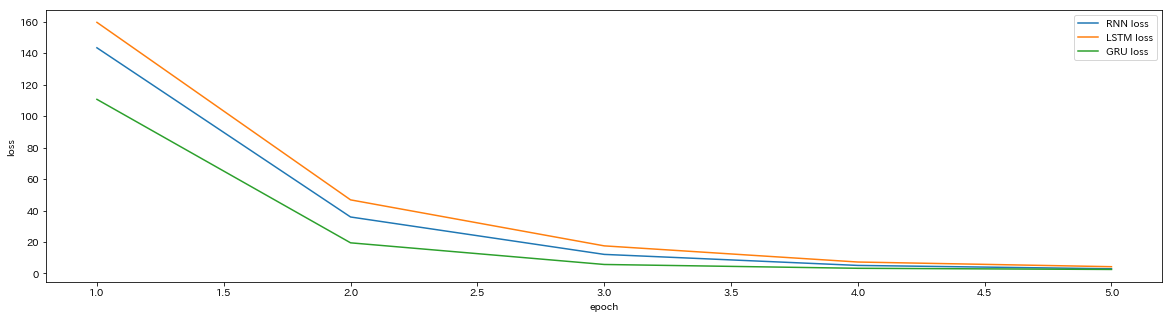

In [214]:
epochs = range(1, len(his_rnn.history['loss']) + 1)
plt.plot(epochs, his_rnn.history['loss'], label='RNN loss')
plt.plot(epochs, his_lstm.history['loss'], label='LSTM loss')
plt.plot(epochs, his_gru.history['loss'], label='GRU loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [231]:
model_gru2 = models.Sequential() # 前回と同じように設定します。
model_gru2.add(layers.GRU(100,
                               activation='tanh',
                               input_shape=(1, ts_size)
                              )
             )
model_gru2.add(layers.Dense(1))
model_gru2.add(layers.Activation("linear"))
model_gru2.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[metrics.mae])

In [232]:
model_gru3 = models.Sequential()
model_gru3.add(layers.GRU(100,
                               activation='tanh',
                               dropout=0.2, # dropoutを追加
                               recurrent_dropout=0.2,
                               input_shape=(1, ts_size)
                              )
             )
model_gru3.add(layers.Dense(1))
model_gru3.add(layers.Activation("linear"))
model_gru3.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[metrics.mae])

In [233]:
model_gru4 = models.Sequential()
model_gru4.add(layers.GRU(100,
                               activation='relu', # 活性化関数をreluに変更
                               input_shape=(1, ts_size)
                              )
             )
model_gru4.add(layers.Dense(1))
model_gru4.add(layers.Activation("linear"))
model_gru4.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[metrics.mae])

In [234]:
# 学習回数を増やします
print("# start GRU2")
his_gru2 = model_gru2.fit(X_train, y_train, batch_size=1, epochs=200, verbose=1, shuffle=False, validation_data=(X_test, y_test))
print("# start GRU3")
his_gru3 = model_gru3.fit(X_train, y_train, batch_size=1, epochs=200, verbose=1, shuffle=False, validation_data=(X_test, y_test))
print("# start GRU4")
his_gru4 = model_gru4.fit(X_train, y_train, batch_size=1, epochs=200, verbose=1, shuffle=False, validation_data=(X_test, y_test))

# start GRU2
Train on 120 samples, validate on 115 samples
Epoch 1/200
120/120 [==============================] - 2s 14ms/step - loss: 127.2365 - mean_absolute_error: 8.8724 - val_loss: 52.2132 - val_mean_absolute_error: 6.1142
Epoch 2/200
120/120 [==============================] - 1s 5ms/step - loss: 29.4966 - mean_absolute_error: 4.4984 - val_loss: 17.6715 - val_mean_absolute_error: 3.4731
Epoch 3/200
120/120 [==============================] - 1s 5ms/step - loss: 10.0835 - mean_absolute_error: 2.5771 - val_loss: 6.3330 - val_mean_absolute_error: 2.0357
Epoch 4/200
120/120 [==============================] - 1s 5ms/step - loss: 4.4494 - mean_absolute_error: 1.6505 - val_loss: 3.9003 - val_mean_absolute_error: 1.6788
Epoch 5/200
120/120 [==============================] - 1s 5ms/step - loss: 3.3093 - mean_absolute_error: 1.4393 - val_loss: 3.0512 - val_mean_absolute_error: 1.4933
Epoch 6/200
120/120 [==============================] - 1s 5ms/step - loss: 2.7206 - mean_absolute_error: 1.31

120/120 [==============================] - 1s 5ms/step - loss: 1.5193 - mean_absolute_error: 0.9787 - val_loss: 1.3373 - val_mean_absolute_error: 0.9562
Epoch 51/200
120/120 [==============================] - 1s 5ms/step - loss: 1.5176 - mean_absolute_error: 0.9783 - val_loss: 1.3339 - val_mean_absolute_error: 0.9548
Epoch 52/200
120/120 [==============================] - 1s 5ms/step - loss: 1.5161 - mean_absolute_error: 0.9779 - val_loss: 1.3306 - val_mean_absolute_error: 0.9535
Epoch 53/200
120/120 [==============================] - 1s 5ms/step - loss: 1.5145 - mean_absolute_error: 0.9774 - val_loss: 1.3274 - val_mean_absolute_error: 0.9523
Epoch 54/200
120/120 [==============================] - 1s 5ms/step - loss: 1.5130 - mean_absolute_error: 0.9769 - val_loss: 1.3242 - val_mean_absolute_error: 0.9510
Epoch 55/200
120/120 [==============================] - 1s 5ms/step - loss: 1.5115 - mean_absolute_error: 0.9764 - val_loss: 1.3212 - val_mean_absolute_error: 0.9497
Epoch 56/200
120/

120/120 [==============================] - 1s 5ms/step - loss: 1.4183 - mean_absolute_error: 0.9184 - val_loss: 1.2808 - val_mean_absolute_error: 0.9026
Epoch 149/200
120/120 [==============================] - 1s 5ms/step - loss: 1.4175 - mean_absolute_error: 0.9181 - val_loss: 1.2817 - val_mean_absolute_error: 0.9027
Epoch 150/200
120/120 [==============================] - 1s 5ms/step - loss: 1.4169 - mean_absolute_error: 0.9178 - val_loss: 1.2826 - val_mean_absolute_error: 0.9028
Epoch 151/200
120/120 [==============================] - 1s 5ms/step - loss: 1.4163 - mean_absolute_error: 0.9175 - val_loss: 1.2836 - val_mean_absolute_error: 0.9031
Epoch 152/200
120/120 [==============================] - 1s 5ms/step - loss: 1.4158 - mean_absolute_error: 0.9173 - val_loss: 1.2846 - val_mean_absolute_error: 0.9033
Epoch 153/200
120/120 [==============================] - 1s 5ms/step - loss: 1.4154 - mean_absolute_error: 0.9171 - val_loss: 1.2856 - val_mean_absolute_error: 0.9039
Epoch 154/20

Epoch 46/200
120/120 [==============================] - 1s 5ms/step - loss: 6.6241 - mean_absolute_error: 1.8689 - val_loss: 2.7416 - val_mean_absolute_error: 1.3435
Epoch 47/200
120/120 [==============================] - 1s 5ms/step - loss: 3.7906 - mean_absolute_error: 1.5370 - val_loss: 2.0783 - val_mean_absolute_error: 1.1752
Epoch 48/200
120/120 [==============================] - 1s 5ms/step - loss: 6.9065 - mean_absolute_error: 1.6965 - val_loss: 2.1745 - val_mean_absolute_error: 1.2000
Epoch 49/200
120/120 [==============================] - 1s 5ms/step - loss: 5.0735 - mean_absolute_error: 1.6738 - val_loss: 2.7216 - val_mean_absolute_error: 1.3540
Epoch 50/200
120/120 [==============================] - 1s 5ms/step - loss: 6.1832 - mean_absolute_error: 1.8849 - val_loss: 2.1291 - val_mean_absolute_error: 1.1970
Epoch 51/200
120/120 [==============================] - 1s 6ms/step - loss: 4.8586 - mean_absolute_error: 1.6852 - val_loss: 3.0490 - val_mean_absolute_error: 1.4257
Epoc

120/120 [==============================] - 1s 5ms/step - loss: 3.0988 - mean_absolute_error: 1.3573 - val_loss: 2.5948 - val_mean_absolute_error: 1.3367
Epoch 145/200
120/120 [==============================] - 1s 5ms/step - loss: 2.7727 - mean_absolute_error: 1.3287 - val_loss: 3.2362 - val_mean_absolute_error: 1.5097
Epoch 146/200
120/120 [==============================] - 1s 5ms/step - loss: 2.8214 - mean_absolute_error: 1.3127 - val_loss: 2.5313 - val_mean_absolute_error: 1.3280
Epoch 147/200
120/120 [==============================] - 1s 6ms/step - loss: 3.0338 - mean_absolute_error: 1.4193 - val_loss: 2.7017 - val_mean_absolute_error: 1.3691
Epoch 148/200
120/120 [==============================] - 1s 5ms/step - loss: 3.0941 - mean_absolute_error: 1.4070 - val_loss: 2.4433 - val_mean_absolute_error: 1.3065
Epoch 149/200
120/120 [==============================] - 1s 5ms/step - loss: 3.0748 - mean_absolute_error: 1.2951 - val_loss: 2.2316 - val_mean_absolute_error: 1.2500
Epoch 150/20

120/120 [==============================] - 1s 5ms/step - loss: 2.4565 - mean_absolute_error: 1.2206 - val_loss: 3.4943 - val_mean_absolute_error: 1.4916
Epoch 43/200
120/120 [==============================] - 1s 5ms/step - loss: 2.4411 - mean_absolute_error: 1.2170 - val_loss: 3.6193 - val_mean_absolute_error: 1.5185
Epoch 44/200
120/120 [==============================] - 1s 5ms/step - loss: 2.4240 - mean_absolute_error: 1.2130 - val_loss: 3.5571 - val_mean_absolute_error: 1.5050
Epoch 45/200
120/120 [==============================] - 1s 5ms/step - loss: 2.4079 - mean_absolute_error: 1.2082 - val_loss: 3.6211 - val_mean_absolute_error: 1.5191
Epoch 46/200
120/120 [==============================] - 1s 5ms/step - loss: 2.3937 - mean_absolute_error: 1.2044 - val_loss: 3.6902 - val_mean_absolute_error: 1.5353
Epoch 47/200
120/120 [==============================] - 1s 5ms/step - loss: 2.3779 - mean_absolute_error: 1.2016 - val_loss: 3.6566 - val_mean_absolute_error: 1.5261
Epoch 48/200
120/

120/120 [==============================] - 1s 5ms/step - loss: 1.8892 - mean_absolute_error: 1.0628 - val_loss: 2.9964 - val_mean_absolute_error: 1.3498
Epoch 141/200
120/120 [==============================] - 1s 5ms/step - loss: 1.8902 - mean_absolute_error: 1.0631 - val_loss: 2.9211 - val_mean_absolute_error: 1.3378
Epoch 142/200
120/120 [==============================] - 1s 5ms/step - loss: 1.8860 - mean_absolute_error: 1.0607 - val_loss: 2.9565 - val_mean_absolute_error: 1.3407
Epoch 143/200
120/120 [==============================] - 1s 5ms/step - loss: 1.8875 - mean_absolute_error: 1.0605 - val_loss: 2.8769 - val_mean_absolute_error: 1.3265
Epoch 144/200
120/120 [==============================] - 1s 5ms/step - loss: 1.8870 - mean_absolute_error: 1.0610 - val_loss: 2.9725 - val_mean_absolute_error: 1.3433
Epoch 145/200
120/120 [==============================] - 1s 5ms/step - loss: 1.8833 - mean_absolute_error: 1.0597 - val_loss: 2.9030 - val_mean_absolute_error: 1.3314
Epoch 146/20

In [235]:
predict_gru2 = model_gru2.predict(X_test)
predict_gru3 = model_gru3.predict(X_test)
predict_gru4 = model_gru4.predict(X_test)

In [236]:
print("GRU2 RMSE：", mean_squared_error(y_test, predict_gru2)) # 前回同様
print("GRU3 RMSE：", mean_squared_error(y_test, predict_gru3)) # G2+dropout追加で過学習軽減
print("GRU4 RMSE：", mean_squared_error(y_test, predict_gru4)) # G2+活性化関数をreluに変更

GRU2 RMSE： 1.3479487102554695
GRU3 RMSE： 2.652635035418319
GRU4 RMSE： 2.8156458046941175


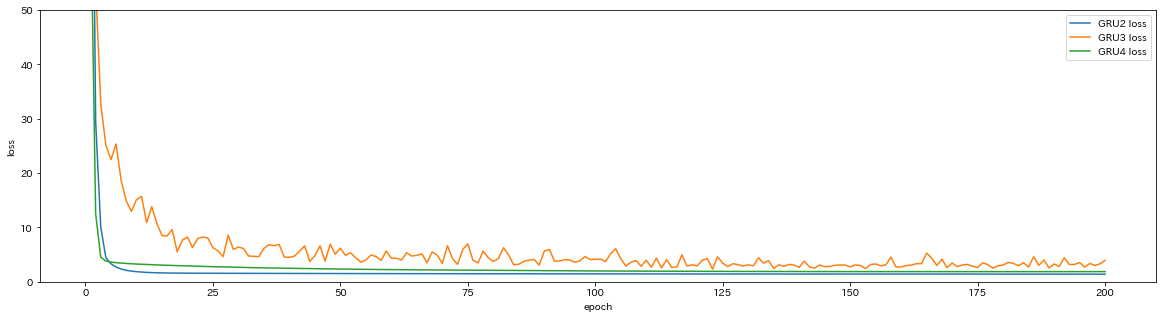

In [240]:
epochs = range(1, len(his_gru2.history['loss']) + 1)
plt.plot(epochs, his_gru2.history['loss'], label='GRU2 loss')
plt.plot(epochs, his_gru3.history['loss'], label='GRU3 loss')
plt.plot(epochs, his_gru4.history['loss'], label='GRU4 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0, 50)
plt.legend()
plt.show()

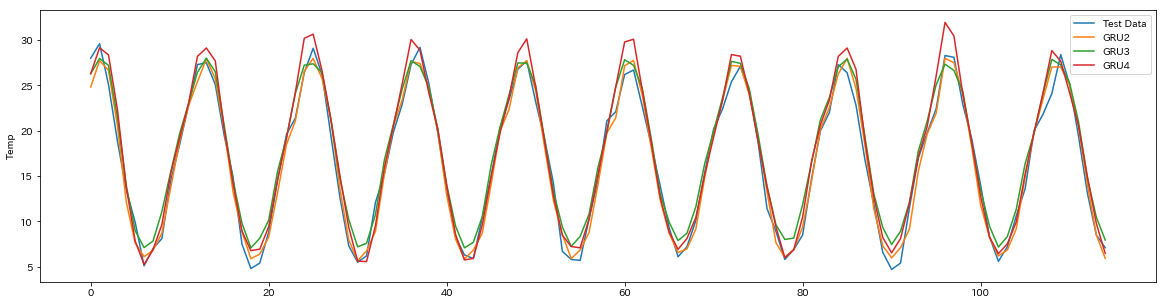

In [241]:
plt.plot(y_test, label='Test Data')
plt.plot(predict_gru2, label='GRU2')
plt.plot(predict_gru3, label='GRU3')
plt.plot(predict_gru4, label='GRU4')
plt.ylabel('Temp')
plt.legend()
plt.show()

# 問1・問2 回答例

# (1) 正規化

In [262]:
# 正規化処理
def scaler_minmax(base_data, ex_data):
    pp_data = []
    for i in ex_data:
        pp_data.append((i - np.min(base_data)) / (np.max(base_data) - np.min(base_data)))
    return np.array(pp_data)

In [281]:
# 正規化を戻します
def scaler_minmax_rescale(base_data, ex_data):
    pp_data = []
    for sc in ex_data:
        pp_data.append(sc * (np.max(base_data) - np.min(base_data)) + np.min(base_data))
    return np.array(pp_data)

In [263]:
# scalerが使えないので下記で処理
list_x = []
for x in X_train:
    list_x.extend(x[0])
list_x = np.array(list_x).reshape(1, -1)

In [264]:
y_train_sc = scaler_minmax(list_x, y_train)
y_test_sc = scaler_minmax(list_x, y_test)

In [275]:
X_train_sc = []
for i in X_train:
    X_train_sc.append(scaler_minmax(list_x, i[0]))
X_train_sc = np.array(X_train_sc)

In [276]:
X_test_sc = []
for i in X_test:
    X_test_sc.append(scaler_minmax(list_x, i[0]))
X_test_sc = np.array(X_test_sc)

In [277]:
X_train_sc = np.reshape(X_train_sc, (X_train_sc.shape[0], 1, X_train_sc.shape[1]))
X_test_sc = np.reshape(X_test_sc, (X_test_sc.shape[0], 1, X_test_sc.shape[1]))

In [282]:
model_ans1 = models.Sequential() # 講義のGRU2と同じように設定します。
model_ans1.add(layers.GRU(100,
                               activation='tanh',
                               input_shape=(1, ts_size)
                              )
             )
model_ans1.add(layers.Dense(1))
model_ans1.add(layers.Activation("linear"))
model_ans1.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[metrics.mae])

In [283]:
print("# start ANS1")
his_ans1 = model_ans1.fit(X_train_sc, y_train_sc, batch_size=1, epochs=300, verbose=1, shuffle=False, validation_data=(X_test_sc, y_test_sc))

# start ANS1
Train on 120 samples, validate on 115 samples
Epoch 1/300
120/120 [==============================] - 2s 15ms/step - loss: 0.1019 - mean_absolute_error: 0.2609 - val_loss: 0.0246 - val_mean_absolute_error: 0.1408
Epoch 2/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0769 - val_loss: 0.0035 - val_mean_absolute_error: 0.0472
Epoch 3/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0517 - val_loss: 0.0034 - val_mean_absolute_error: 0.0469
Epoch 4/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0509 - val_loss: 0.0034 - val_mean_absolute_error: 0.0466
Epoch 5/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0502 - val_loss: 0.0034 - val_mean_absolute_error: 0.0464
Epoch 6/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0496 - v

120/120 [==============================] - 1s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0431 - val_loss: 0.0038 - val_mean_absolute_error: 0.0499
Epoch 51/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0430 - val_loss: 0.0038 - val_mean_absolute_error: 0.0499
Epoch 52/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0430 - val_loss: 0.0038 - val_mean_absolute_error: 0.0499
Epoch 53/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0430 - val_loss: 0.0038 - val_mean_absolute_error: 0.0499
Epoch 54/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0430 - val_loss: 0.0038 - val_mean_absolute_error: 0.0499
Epoch 55/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0429 - val_loss: 0.0038 - val_mean_absolute_error: 0.0499
Epoch 56/300
120/

120/120 [==============================] - 1s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0412 - val_loss: 0.0035 - val_mean_absolute_error: 0.0479
Epoch 149/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0412 - val_loss: 0.0035 - val_mean_absolute_error: 0.0479
Epoch 150/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0412 - val_loss: 0.0034 - val_mean_absolute_error: 0.0479
Epoch 151/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0412 - val_loss: 0.0034 - val_mean_absolute_error: 0.0479
Epoch 152/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0411 - val_loss: 0.0034 - val_mean_absolute_error: 0.0478
Epoch 153/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0411 - val_loss: 0.0034 - val_mean_absolute_error: 0.0478
Epoch 154/30

120/120 [==============================] - 1s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0402 - val_loss: 0.0031 - val_mean_absolute_error: 0.0455
Epoch 247/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0402 - val_loss: 0.0031 - val_mean_absolute_error: 0.0455
Epoch 248/300
120/120 [==============================] - 1s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0401 - val_loss: 0.0031 - val_mean_absolute_error: 0.0455
Epoch 249/300
120/120 [==============================] - 1s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0401 - val_loss: 0.0031 - val_mean_absolute_error: 0.0454
Epoch 250/300
120/120 [==============================] - 1s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0401 - val_loss: 0.0031 - val_mean_absolute_error: 0.0454
Epoch 251/300
120/120 [==============================] - 1s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0401 - val_loss: 0.0031 - val_mean_absolute_error: 0.0454
Epoch 252/30

In [289]:
predict_ans1_sc = model_ans1.predict(X_test_sc)
predict_ans1 = scaler_minmax_rescale(list_x, predict_ans1_sc) # もとの値に戻します
y_test = scaler_minmax_rescale(list_x, y_test_sc)

In [290]:
print("ANS1 RMSE：", mean_squared_error(y_test, predict_ans1))

ANS1 RMSE： 1.6767458119902163


# (2) 時系列データの長さ調整

In [54]:
columns = ['params', 'RMSE']
result_test = pd.DataFrame(columns=columns)
j = 0
for i in range(1, 110):
    print("#----------------------------------------------#")
    print("# Start Calc >> Data Length %s" % i)
    print("#----------------------------------------------#")
    
    # 時系列の長さを設定
    ts_size = i
    len_size = len(data_base)
    shape_size = len_size - ts_size
    
    # データを分割
    data_x = []
    data_y = []
    for k in range(shape_size):
        k_for = len_size - shape_size + k
        data_x.append(data_base[k:k_for])
        data_y.append(data_base[k_for])
    data_x = np.array(data_x)
    data_y = np.array(data_y)
    
    # train, testへ変換
    X_train = data_x[:train_len]
    X_test = data_x[train_len:]
    y_train = data_y[:train_len]
    y_test = data_y[train_len:]
    
    # 形式を設定
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    
    # モデルの再設定
    model_ans2 = models.Sequential()
    model_ans2.add(layers.GRU(75, # 学習速度確保のためにGRUに、層を75あたりにすると良い。
                              activation='tanh',
                              input_shape=(1, ts_size)
                             )
                  )
    model_ans2.add(layers.Dense(1))
    model_ans2.add(layers.Activation("linear"))
    model_ans2.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[metrics.mae])
    
    # 学習
    model_ans2.fit(X_train, y_train, batch_size=1, epochs=50, verbose=1, shuffle=False, validation_data=(X_test, y_test))
    
    # 計算
    test_value = mean_squared_error(y_test, model_ans2.predict(X_test))
    print("RMSE：", test_value)
    result_test = result_test.append(pd.Series(data=["p=%s" % i, test_value], index=columns, name=j))
    j += 1

#----------------------------------------------#
# Start Calc >> Data Length 1
#----------------------------------------------#
Train on 120 samples, validate on 120 samples
Epoch 1/50
120/120 [==============================] - 1s 7ms/step - loss: 168.2215 - mean_absolute_error: 10.9545 - val_loss: 88.2106 - val_mean_absolute_error: 7.5666
Epoch 2/50
120/120 [==============================] - 0s 4ms/step - loss: 51.3764 - mean_absolute_error: 5.8615 - val_loss: 34.8542 - val_mean_absolute_error: 5.0414
Epoch 3/50
120/120 [==============================] - 0s 4ms/step - loss: 27.6013 - mean_absolute_error: 4.4458 - val_loss: 25.0900 - val_mean_absolute_error: 4.2408
Epoch 4/50
120/120 [==============================] - 1s 4ms/step - loss: 21.6716 - mean_absolute_error: 3.9526 - val_loss: 21.2275 - val_mean_absolute_error: 3.9680
Epoch 5/50
120/120 [==============================] - 0s 4ms/step - loss: 19.1209 - mean_absolute_error: 3.7569 - val_loss: 19.5592 - val_mean_absolute_error: 3

120/120 [==============================] - 0s 4ms/step - loss: 16.1735 - mean_absolute_error: 3.5095 - val_loss: 17.1308 - val_mean_absolute_error: 3.6785
Epoch 50/50
120/120 [==============================] - 0s 4ms/step - loss: 16.1686 - mean_absolute_error: 3.5095 - val_loss: 17.1249 - val_mean_absolute_error: 3.6776
RMSE： 17.124938570134372
#----------------------------------------------#
# Start Calc >> Data Length 2
#----------------------------------------------#
Train on 120 samples, validate on 119 samples
Epoch 1/50
120/120 [==============================] - 1s 7ms/step - loss: 165.5054 - mean_absolute_error: 10.7236 - val_loss: 73.8056 - val_mean_absolute_error: 7.1182
Epoch 2/50
120/120 [==============================] - 0s 4ms/step - loss: 44.9293 - mean_absolute_error: 5.6550 - val_loss: 31.8037 - val_mean_absolute_error: 4.8394
Epoch 3/50
120/120 [==============================] - 0s 4ms/step - loss: 22.2507 - mean_absolute_error: 3.9597 - val_loss: 16.8514 - val_mean_ab

120/120 [==============================] - 0s 4ms/step - loss: 2.6088 - mean_absolute_error: 1.2767 - val_loss: 2.4622 - val_mean_absolute_error: 1.2853
Epoch 46/50
120/120 [==============================] - 0s 4ms/step - loss: 2.6034 - mean_absolute_error: 1.2746 - val_loss: 2.4556 - val_mean_absolute_error: 1.2828
Epoch 47/50
120/120 [==============================] - 0s 4ms/step - loss: 2.5981 - mean_absolute_error: 1.2726 - val_loss: 2.4489 - val_mean_absolute_error: 1.2804
Epoch 48/50
120/120 [==============================] - 0s 4ms/step - loss: 2.5930 - mean_absolute_error: 1.2706 - val_loss: 2.4423 - val_mean_absolute_error: 1.2780
Epoch 49/50
120/120 [==============================] - 0s 4ms/step - loss: 2.5880 - mean_absolute_error: 1.2686 - val_loss: 2.4358 - val_mean_absolute_error: 1.2756
Epoch 50/50
120/120 [==============================] - 0s 4ms/step - loss: 2.5832 - mean_absolute_error: 1.2667 - val_loss: 2.4294 - val_mean_absolute_error: 1.2733
RMSE： 2.42935984932288

120/120 [==============================] - 0s 4ms/step - loss: 1.6279 - mean_absolute_error: 0.9755 - val_loss: 1.5093 - val_mean_absolute_error: 1.0106
Epoch 42/50
120/120 [==============================] - 0s 4ms/step - loss: 1.6267 - mean_absolute_error: 0.9755 - val_loss: 1.5106 - val_mean_absolute_error: 1.0107
Epoch 43/50
120/120 [==============================] - 0s 4ms/step - loss: 1.6255 - mean_absolute_error: 0.9753 - val_loss: 1.5120 - val_mean_absolute_error: 1.0108
Epoch 44/50
120/120 [==============================] - 0s 4ms/step - loss: 1.6241 - mean_absolute_error: 0.9752 - val_loss: 1.5135 - val_mean_absolute_error: 1.0110
Epoch 45/50
120/120 [==============================] - 0s 4ms/step - loss: 1.6228 - mean_absolute_error: 0.9749 - val_loss: 1.5154 - val_mean_absolute_error: 1.0113
Epoch 46/50
120/120 [==============================] - 0s 4ms/step - loss: 1.6215 - mean_absolute_error: 0.9745 - val_loss: 1.5179 - val_mean_absolute_error: 1.0115
Epoch 47/50
120/120 [=

120/120 [==============================] - 0s 4ms/step - loss: 1.4336 - mean_absolute_error: 0.9758 - val_loss: 1.4096 - val_mean_absolute_error: 0.9587
Epoch 38/50
120/120 [==============================] - 0s 4ms/step - loss: 1.4333 - mean_absolute_error: 0.9757 - val_loss: 1.4093 - val_mean_absolute_error: 0.9586
Epoch 39/50
120/120 [==============================] - 0s 4ms/step - loss: 1.4329 - mean_absolute_error: 0.9756 - val_loss: 1.4086 - val_mean_absolute_error: 0.9583
Epoch 40/50
120/120 [==============================] - 0s 4ms/step - loss: 1.4323 - mean_absolute_error: 0.9755 - val_loss: 1.4073 - val_mean_absolute_error: 0.9579
Epoch 41/50
120/120 [==============================] - 0s 4ms/step - loss: 1.4315 - mean_absolute_error: 0.9752 - val_loss: 1.4056 - val_mean_absolute_error: 0.9573
Epoch 42/50
120/120 [==============================] - 0s 4ms/step - loss: 1.4307 - mean_absolute_error: 0.9748 - val_loss: 1.4035 - val_mean_absolute_error: 0.9567
Epoch 43/50
120/120 [=

KeyboardInterrupt: 

In [ ]:
result_test.sort_values(by='RMSE').head(10)

In [213]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [256]:
# 学習epoch（0～）ごとに学習率低減を実装
def step_decay(epoch):
    x = 1e-3
    if epoch >= 150:
        x = 1e-4
    return x

In [257]:
model_decay = LearningRateScheduler(step_decay, verbose=1)

In [258]:
# 重みの保存を実装
model_check = ModelCheckpoint(filepath='weight_save2.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [55]:
ts_size = 52 # 時系列の長さを設定
len_size = len(data_base)
shape_size = len_size - ts_size

In [56]:
data_x = []
data_y = []
for i in range(shape_size):
    i_for = len_size - shape_size + i
    data_x.append(data_base[i:i_for])
    data_y.append(data_base[i_for])
data_x = np.array(data_x)
data_y = np.array(data_y)

In [57]:
print(data_x.shape, data_y.shape)

(189, 52) (189,)


In [58]:
X_train = data_x[:train_len]
X_test = data_x[train_len:]
y_train = data_y[:train_len]
y_test = data_y[train_len:]

In [59]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [60]:
print(X_train.shape, X_test.shape)

(120, 1, 52) (69, 1, 52)


In [265]:
model_ans2 = models.Sequential()
model_ans2.add(layers.GRU(75,
                               activation='tanh',
                               input_shape=(1, ts_size)
                              )
             )
model_ans2.add(layers.Dense(1))
model_ans2.add(layers.Activation("linear"))
model_ans2.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[metrics.mae])

In [266]:
print("# start ANS2")
his_ans2 = model_ans2.fit(
    X_train, y_train,
    batch_size=1, epochs=200, verbose=1, shuffle=False,
    validation_data=(X_test, y_test),
    callbacks=[model_decay, model_check]
)

# start ANS2
Train on 120 samples, validate on 69 samples
Epoch 1/200

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 2s 16ms/step - loss: 104.6484 - mean_absolute_error: 7.9544 - val_loss: 52.9586 - val_mean_absolute_error: 5.5336

Epoch 00001: val_loss improved from inf to 52.95858, saving model to weight_save.hdf5
Epoch 2/200

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 36.3075 - mean_absolute_error: 4.4412 - val_loss: 18.7933 - val_mean_absolute_error: 3.1421

Epoch 00002: val_loss improved from 52.95858 to 18.79329, saving model to weight_save.hdf5
Epoch 3/200

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 13.9265 - mean_absolute_error: 2.6725 - val_loss: 6.6272 - val_mean_absolute_error: 1.8214

Epoch 00003: val_loss improved from 18.79329 to 6.62719,

120/120 [==============================] - 1s 6ms/step - loss: 1.8355 - mean_absolute_error: 1.1107 - val_loss: 2.2018 - val_mean_absolute_error: 1.1864

Epoch 00028: val_loss did not improve from 1.12671
Epoch 29/200

Epoch 00029: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 2.1360 - mean_absolute_error: 1.1910 - val_loss: 2.3651 - val_mean_absolute_error: 1.1983

Epoch 00029: val_loss did not improve from 1.12671
Epoch 30/200

Epoch 00030: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 1.9123 - mean_absolute_error: 1.1432 - val_loss: 1.9397 - val_mean_absolute_error: 1.0835

Epoch 00030: val_loss did not improve from 1.12671
Epoch 31/200

Epoch 00031: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 5ms/step - loss: 1.8909 - mean_absolute_error: 1.0893 - val_loss: 1.5470 - val_mean_absolute_err

120/120 [==============================] - 1s 6ms/step - loss: 1.7332 - mean_absolute_error: 1.0382 - val_loss: 1.5301 - val_mean_absolute_error: 1.0364

Epoch 00057: val_loss did not improve from 1.12671
Epoch 58/200

Epoch 00058: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 1.8018 - mean_absolute_error: 1.0594 - val_loss: 1.6523 - val_mean_absolute_error: 1.0630

Epoch 00058: val_loss did not improve from 1.12671
Epoch 59/200

Epoch 00059: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 1.4639 - mean_absolute_error: 0.9365 - val_loss: 1.6087 - val_mean_absolute_error: 1.0199

Epoch 00059: val_loss did not improve from 1.12671
Epoch 60/200

Epoch 00060: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 1.6467 - mean_absolute_error: 1.0340 - val_loss: 1.5169 - val_mean_absolute_err


Epoch 00085: val_loss did not improve from 1.05588
Epoch 86/200

Epoch 00086: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 1.4873 - mean_absolute_error: 0.9456 - val_loss: 1.3241 - val_mean_absolute_error: 0.9154

Epoch 00086: val_loss did not improve from 1.05588
Epoch 87/200

Epoch 00087: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 1.4792 - mean_absolute_error: 0.9801 - val_loss: 1.5374 - val_mean_absolute_error: 0.9549

Epoch 00087: val_loss did not improve from 1.05588
Epoch 88/200

Epoch 00088: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 1.4579 - mean_absolute_error: 1.0003 - val_loss: 1.3619 - val_mean_absolute_error: 0.9459

Epoch 00088: val_loss did not improve from 1.05588
Epoch 89/200

Epoch 00089: LearningRateScheduler setting learning rate to 0.001.
120/120 [

120/120 [==============================] - 1s 6ms/step - loss: 1.4332 - mean_absolute_error: 0.9295 - val_loss: 1.3697 - val_mean_absolute_error: 0.9382

Epoch 00143: val_loss did not improve from 1.05588
Epoch 144/200

Epoch 00144: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 1.3609 - mean_absolute_error: 0.9340 - val_loss: 1.9566 - val_mean_absolute_error: 1.1074

Epoch 00144: val_loss did not improve from 1.05588
Epoch 145/200

Epoch 00145: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 1.4981 - mean_absolute_error: 0.9760 - val_loss: 1.7249 - val_mean_absolute_error: 1.0346

Epoch 00145: val_loss did not improve from 1.05588
Epoch 146/200

Epoch 00146: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 1.5433 - mean_absolute_error: 0.9957 - val_loss: 1.2800 - val_mean_absolute_

120/120 [==============================] - 1s 6ms/step - loss: 1.2480 - mean_absolute_error: 0.8971 - val_loss: 1.8313 - val_mean_absolute_error: 1.0566

Epoch 00172: val_loss did not improve from 1.05588
Epoch 173/200

Epoch 00173: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 1.3002 - mean_absolute_error: 0.9107 - val_loss: 1.8952 - val_mean_absolute_error: 1.0580

Epoch 00173: val_loss did not improve from 1.05588
Epoch 174/200

Epoch 00174: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 1.3593 - mean_absolute_error: 0.9424 - val_loss: 1.5494 - val_mean_absolute_error: 0.9917

Epoch 00174: val_loss did not improve from 1.05588
Epoch 175/200

Epoch 00175: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 6ms/step - loss: 1.3188 - mean_absolute_error: 0.8908 - val_loss: 1.5933 - val_mean_absolute_

In [267]:
model_ans2.load_weights("weight_save2.hdf5")

In [268]:
predict_ans2 = model_ans2.predict(X_test)
print("ANS2 RMSE：", mean_squared_error(y_test, predict_ans2))

ANS2 RMSE： 1.0558799474291372


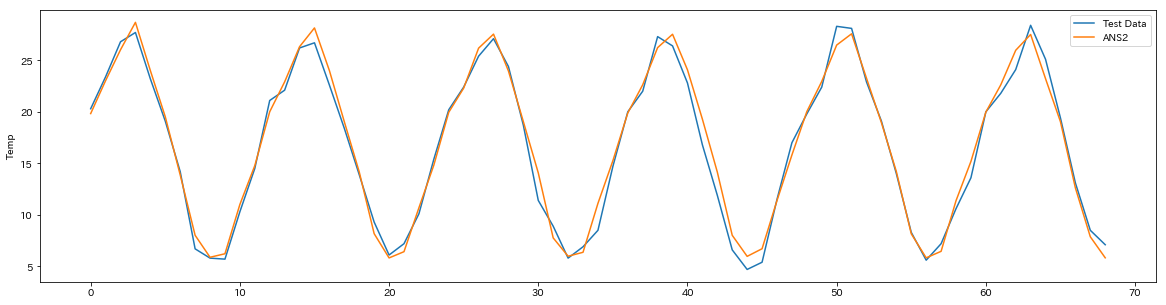

In [280]:
plt.plot(y_test, label='Test Data')
plt.plot(predict_ans2, label='ANS2')
plt.ylabel('Temp')
plt.legend()
plt.show()

# (3) 特徴量の追加

In [83]:
# train
data_train = []
for i in X_train:
    nm_max = np.max(i[0]) # 最大値
    nm_min = np.min(i[0]) # 最小値
    nm_ave = np.average(i[0]) # 重み付け平均も可能
    nm_med = np.median(i[0]) # 中央値
    nm_std = np.std(i[0]) # 標準偏差
    data_train.append(np.append(np.array(i[0]), [nm_max, nm_min, nm_ave, nm_med, nm_std]))
data_train = np.array(data_train)

In [84]:
data_test = []
for i in X_test:
    nm_max = np.max(i[0])
    nm_min = np.min(i[0])
    nm_ave = np.average(i[0]) # 重み付け平均も可能
    nm_med = np.median(i[0])
    nm_std = np.std(i[0])
    data_test.append(np.append(np.array(i[0]), [nm_max, nm_min, nm_ave, nm_med, nm_std]))
data_test = np.array(data_test)

In [85]:
X_train = np.reshape(data_train, (data_train.shape[0], 1, data_train.shape[1]))
X_test = np.reshape(data_test, (data_test.shape[0], 1, data_test.shape[1]))

In [86]:
print(X_train.shape, X_test.shape)

(120, 1, 57) (69, 1, 57)


In [90]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [91]:
# 学習epoch（0～）ごとに学習率低減を実装
def step_decay(epoch):
    x = 1e-3
    if epoch >= 150:
        x = 1e-4
    return x

In [92]:
model_decay = LearningRateScheduler(step_decay, verbose=1)

In [93]:
# 重みの保存を実装
model_check = ModelCheckpoint(filepath='weight_save3.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [96]:
model_ans3 = models.Sequential()
model_ans3.add(layers.GRU(80, # 情報量を増やしたので少し増やす
                               activation='tanh',
                               input_shape=(1, ts_size + 5) # 追加した大きさを忘れずに X_train.shape[2]も可
                              )
             )
model_ans3.add(layers.Dense(1))
model_ans3.add(layers.Activation("linear"))
model_ans3.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[metrics.mae])

In [97]:
print("# start ANS3")
his_ans3 = model_ans3.fit(
    X_train, y_train,
    batch_size=1, epochs=200, verbose=1, shuffle=False,
    validation_data=(X_test, y_test),
    callbacks=[model_decay, model_check]
)

# start ANS3
Train on 120 samples, validate on 69 samples
Epoch 1/200

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 1s 10ms/step - loss: 91.4884 - mean_absolute_error: 7.2841 - val_loss: 42.2642 - val_mean_absolute_error: 4.9113

Epoch 00001: val_loss improved from inf to 42.26418, saving model to weight_save.hdf5
Epoch 2/200

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 28.2436 - mean_absolute_error: 3.8586 - val_loss: 13.8654 - val_mean_absolute_error: 2.6896

Epoch 00002: val_loss improved from 42.26418 to 13.86539, saving model to weight_save.hdf5
Epoch 3/200

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 10.5380 - mean_absolute_error: 2.4123 - val_loss: 5.0805 - val_mean_absolute_error: 1.6479

Epoch 00003: val_loss improved from 13.86539 to 5.08048, 

120/120 [==============================] - 0s 4ms/step - loss: 1.6603 - mean_absolute_error: 1.0316 - val_loss: 1.5264 - val_mean_absolute_error: 0.9964

Epoch 00028: val_loss did not improve from 1.09149
Epoch 29/200

Epoch 00029: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.8879 - mean_absolute_error: 1.0916 - val_loss: 1.6244 - val_mean_absolute_error: 1.0162

Epoch 00029: val_loss did not improve from 1.09149
Epoch 30/200

Epoch 00030: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.7443 - mean_absolute_error: 1.0453 - val_loss: 1.6758 - val_mean_absolute_error: 1.0091

Epoch 00030: val_loss did not improve from 1.09149
Epoch 31/200

Epoch 00031: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.7853 - mean_absolute_error: 1.0593 - val_loss: 1.6543 - val_mean_absolute_err


Epoch 00056: val_loss did not improve from 1.04100
Epoch 57/200

Epoch 00057: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.7129 - mean_absolute_error: 1.0263 - val_loss: 1.1771 - val_mean_absolute_error: 0.8760

Epoch 00057: val_loss did not improve from 1.04100
Epoch 58/200

Epoch 00058: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.6182 - mean_absolute_error: 0.9953 - val_loss: 1.7079 - val_mean_absolute_error: 1.0514

Epoch 00058: val_loss did not improve from 1.04100
Epoch 59/200

Epoch 00059: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.8806 - mean_absolute_error: 1.0970 - val_loss: 1.8424 - val_mean_absolute_error: 1.0640

Epoch 00059: val_loss did not improve from 1.04100
Epoch 60/200

Epoch 00060: LearningRateScheduler setting learning rate to 0.001.
120/120 [

120/120 [==============================] - 0s 4ms/step - loss: 1.3710 - mean_absolute_error: 0.9070 - val_loss: 1.2837 - val_mean_absolute_error: 0.8634

Epoch 00085: val_loss did not improve from 0.97741
Epoch 86/200

Epoch 00086: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.3552 - mean_absolute_error: 0.9347 - val_loss: 1.4419 - val_mean_absolute_error: 0.9368

Epoch 00086: val_loss did not improve from 0.97741
Epoch 87/200

Epoch 00087: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.5509 - mean_absolute_error: 0.9884 - val_loss: 1.3370 - val_mean_absolute_error: 0.8865

Epoch 00087: val_loss did not improve from 0.97741
Epoch 88/200

Epoch 00088: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.4773 - mean_absolute_error: 0.9906 - val_loss: 1.1859 - val_mean_absolute_err

120/120 [==============================] - 0s 4ms/step - loss: 1.6693 - mean_absolute_error: 0.9877 - val_loss: 1.3202 - val_mean_absolute_error: 0.8850

Epoch 00114: val_loss did not improve from 0.97741
Epoch 115/200

Epoch 00115: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.8562 - mean_absolute_error: 1.0881 - val_loss: 1.3685 - val_mean_absolute_error: 0.9370

Epoch 00115: val_loss did not improve from 0.97741
Epoch 116/200

Epoch 00116: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.5835 - mean_absolute_error: 0.9813 - val_loss: 1.4765 - val_mean_absolute_error: 0.9576

Epoch 00116: val_loss did not improve from 0.97741
Epoch 117/200

Epoch 00117: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.7299 - mean_absolute_error: 0.9962 - val_loss: 1.5788 - val_mean_absolute_

120/120 [==============================] - 0s 4ms/step - loss: 1.3210 - mean_absolute_error: 0.8997 - val_loss: 1.3881 - val_mean_absolute_error: 0.9533

Epoch 00143: val_loss did not improve from 0.97741
Epoch 144/200

Epoch 00144: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.3245 - mean_absolute_error: 0.8905 - val_loss: 1.4515 - val_mean_absolute_error: 0.9540

Epoch 00144: val_loss did not improve from 0.97741
Epoch 145/200

Epoch 00145: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.3631 - mean_absolute_error: 0.8852 - val_loss: 1.6015 - val_mean_absolute_error: 1.0101

Epoch 00145: val_loss did not improve from 0.97741
Epoch 146/200

Epoch 00146: LearningRateScheduler setting learning rate to 0.001.
120/120 [==============================] - 0s 4ms/step - loss: 1.3837 - mean_absolute_error: 0.8926 - val_loss: 1.5906 - val_mean_absolute_


Epoch 00171: val_loss did not improve from 0.97741
Epoch 172/200

Epoch 00172: LearningRateScheduler setting learning rate to 0.0001.
120/120 [==============================] - 0s 4ms/step - loss: 0.8119 - mean_absolute_error: 0.6836 - val_loss: 1.3246 - val_mean_absolute_error: 0.9421

Epoch 00172: val_loss did not improve from 0.97741
Epoch 173/200

Epoch 00173: LearningRateScheduler setting learning rate to 0.0001.
120/120 [==============================] - 0s 4ms/step - loss: 0.8122 - mean_absolute_error: 0.6830 - val_loss: 1.3253 - val_mean_absolute_error: 0.9423

Epoch 00173: val_loss did not improve from 0.97741
Epoch 174/200

Epoch 00174: LearningRateScheduler setting learning rate to 0.0001.
120/120 [==============================] - 0s 4ms/step - loss: 0.8125 - mean_absolute_error: 0.6823 - val_loss: 1.3264 - val_mean_absolute_error: 0.9426

Epoch 00174: val_loss did not improve from 0.97741
Epoch 175/200

Epoch 00175: LearningRateScheduler setting learning rate to 0.0001.
1

120/120 [==============================] - 0s 4ms/step - loss: 0.7764 - mean_absolute_error: 0.6671 - val_loss: 1.4273 - val_mean_absolute_error: 0.9657

Epoch 00200: val_loss did not improve from 0.97741


In [98]:
model_ans3.load_weights("weight_save3.hdf5")

In [99]:
predict_ans3 = model_ans3.predict(X_test)
print("ANS3 RMSE：", mean_squared_error(y_test, predict_ans3))

ANS3 RMSE： 0.9774130428371108


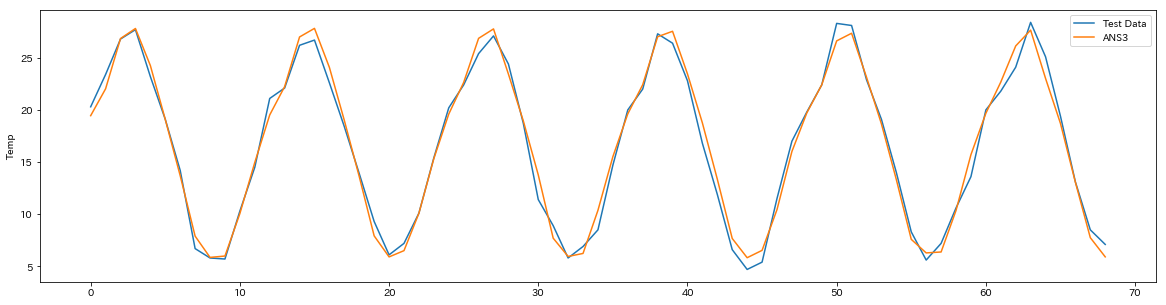

In [100]:
plt.plot(y_test, label='Test Data')
plt.plot(predict_ans3, label='ANS3')
plt.ylabel('Temp')
plt.legend()
plt.show()

# (4)パラメータチューニング